# Summary of the CST simulations 

Upodated at 8th of March

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pnd
import glob

In [2]:
fpath = '/Users/esenes/work/Diffraction-Cherenkov/CST-triangular-prism-tests/'
folders = 'prism_20mm_side_50mmbehind_7cell_1cmbore_5ns_scan/'
field_path = 'Probe Signals/'

# time domain filenames
f_comp = ['E-Field (-75 0 0)(Abs) (pb).txt',
          'E-Field (-75 0 0)(X) (pb).txt',
          'E-Field (-75 0 0)(Y) (pb).txt',
          'E-Field (-75 0 0)(Z) (pb).txt',
          'E-Field (75 0 0)(Abs) (pb).txt',
          'E-Field (75 0 0)(X) (pb).txt',
          'E-Field (75 0 0)(Y) (pb).txt',
          'E-Field (75 0 0)(Z) (pb).txt',
          'E-Field (-25 0 35)(Abs) (pb).txt',
          'E-Field (-25 0 35)(X) (pb).txt',
          'E-Field (-25 0 35)(Y) (pb).txt',
          'E-Field (-25 0 35)(Z) (pb).txt',
          'E-Field (25 0 35)(Abs) (pb).txt',
          'E-Field (25 0 35)(X) (pb).txt',
          'E-Field (25 0 35)(Y) (pb).txt',
          'E-Field (25 0 35)(Z) (pb).txt']

In [3]:
def read_CST_param_results(fname,delimiter = '#', verbose=True):
    '''
    Read a CST ASCII output file from a parametric simulation

    Inputs:
    - fname:        filename, including path
    - delimiter:    comment delimiter (default = #)
    - verbose:      print the headers as you parse
    
    Outputs:
    - file_divided: the file split at each delimiter. Data are
                    numpy arrays, the rest are strings.
    - data_flag:    flag for the data
    
    Access the data after the split as file_divided[data_flag]. 
    The other lines are the headers, printed when the function 
    is called.

    Last modified: 08.04.2019 by Eugenio Senes
    '''

    with open(fname,'r') as f:
        full_txt = f.readlines()
        row_n_delim = []
        #search the delimiters
        for k, row in enumerate(full_txt):
            if row[0] == delimiter:
                row_n_delim.append(k)
                print(row) if verbose else None
        #fraction the file
        file_divided = []
        for k in list(range(len(row_n_delim))):
            if k<len(row_n_delim)-1:
                #If data, cast to numpy array
                if row_n_delim[k+1]-row_n_delim[k]>1: # this is a number array
                    frac = np.array([[float(j)for j in row.split('\t')] for row in full_txt[row_n_delim[k]+1:row_n_delim[k+1]]])
                    file_divided.append(frac.T)
                else: # headers --> stay strings
                    file_divided.append(full_txt[row_n_delim[k]:row_n_delim[k+1]])       
            else:
                frac = np.array([[float(j)for j in row.split('\t')] for row in full_txt[row_n_delim[k]+1:-1]])
                file_divided.append(frac.T)
        
        #cast the list to numpy arrays and flag what is data 
        data_flag = [type(k)==np.ndarray for k in file_divided]
        
        return np.array(file_divided), data_flag

def create_empty_dataframe(param_values, column_names):
    '''
    Create an empty pandas dataframe of np.ndarr

    Last modified: 08.04.2019 by Eugenio Senes
    '''
    return pnd.DataFrame([[np.empty(0)]*len(column_names)]*len(param_values), index=param_values, columns=column_names)
    

In [4]:
# open the files and fill the dataframes
beam_position = np.array([-4., -2., 0., 2., 4.])

# empty dataframe of np arrays
data = create_empty_dataframe(beam_position, [f.strip('(pb).txt') for f in f_comp] )

# fill up the dataframe
for f in f_comp:
    out, flag = read_CST_param_results(fpath+folders+field_path+f, verbose=False)
    data[f.strip('(pb).txt')] = out[flag]
    

In [5]:
data

,E-Field (-75 0 0)(Abs),E-Field (-75 0 0)(X),E-Field (-75 0 0)(Y),E-Field (-75 0 0)(Z),E-Field (75 0 0)(Abs),E-Field (75 0 0)(X),E-Field (75 0 0)(Y),E-Field (75 0 0)(Z),E-Field (-25 0 35)(Abs),E-Field (-25 0 35)(X),E-Field (-25 0 35)(Y),E-Field (-25 0 35)(Z),E-Field (25 0 35)(Abs),E-Field (25 0 35)(X),E-Field (25 0 35)(Y),E-Field (25 0 35)(Z)
-4.0,"[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173..."
-2.0,"[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897..."
0.0,"[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869..."
2.0,"[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194..."
4.0,"[[0.0, 0.00013726405713303, 0.0002745281142660...","[[0.0, 0.00013726405713303, 0.0002745281142660...","[[0.0, 0.00013726405713303, 0.0002745281142660...","[[0.0, 0.00013726405713303, 0.0002745281142660...","[[0.0, 0.00013726405713303, 0.0002745281142660...","[[0.0, 0.00013726405713303, 0.00027452811426

# Plotting

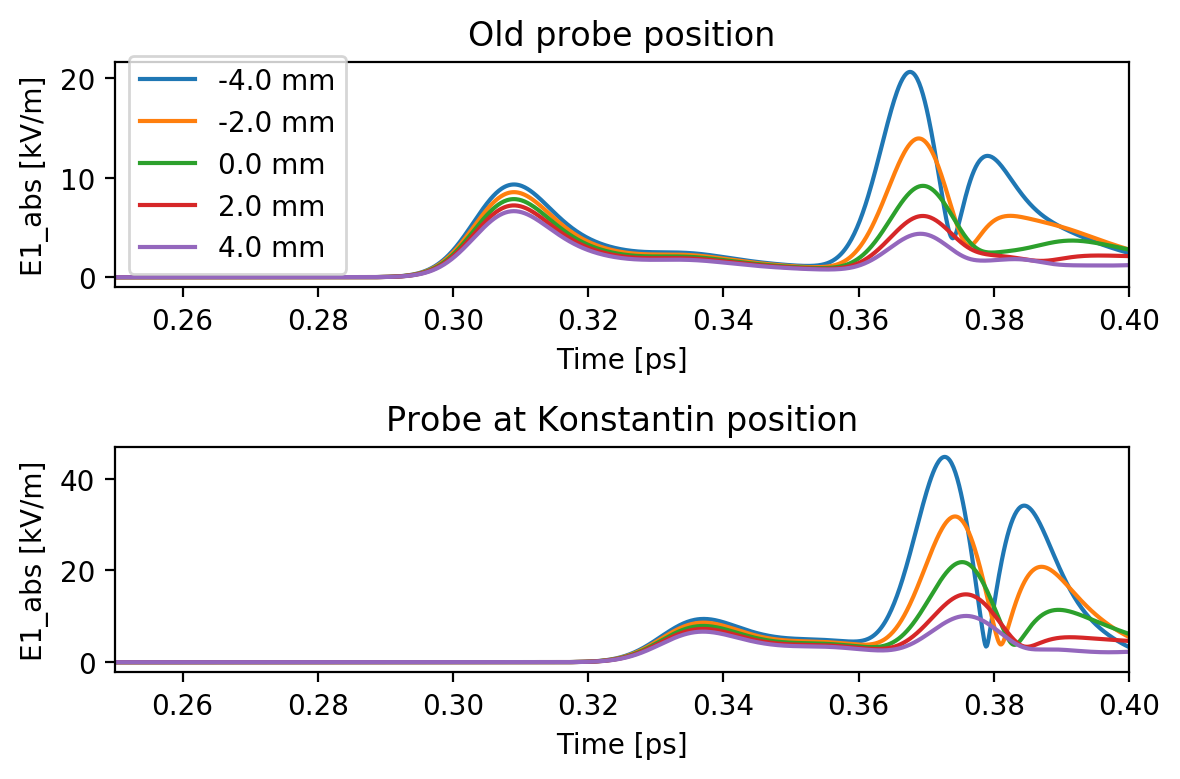

In [6]:
fig, ax = plt.subplots(2, dpi=200)

for k in beam_position:
    xx = data['E-Field (-75 0 0)(Abs) '].loc[k][0,:]
    yy = 1e-3*data['E-Field (-75 0 0)(Abs) '].loc[k][1,:]
    ax[0].plot(xx, yy, label=str(k)+' mm')

ax[0].legend(frameon=True)
ax[0].set_title('Old probe position')
ax[0].set_xlabel('Time [ps]')
ax[0].set_ylabel('E1_abs [kV/m]')
ax[0].set_xlim(0.25,0.4)

for k in beam_position:
    xx = data['E-Field (-25 0 35)(Abs) '].loc[k][0,:]
    yy = 1e-3*data['E-Field (-25 0 35)(Abs) '].loc[k][1,:]
    ax[1].plot(xx, yy, label=str(k)+' mm')

# ax[1].legend(frameon=True)
ax[1].set_title('Probe at Konstantin position')
ax[1].set_xlabel('Time [ps]')
ax[1].set_ylabel('E1_abs [kV/m]')
ax[1].set_xlim(0.25,0.4)

plt.tight_layout()

# plt.savefig('side_abs.png',format='png')

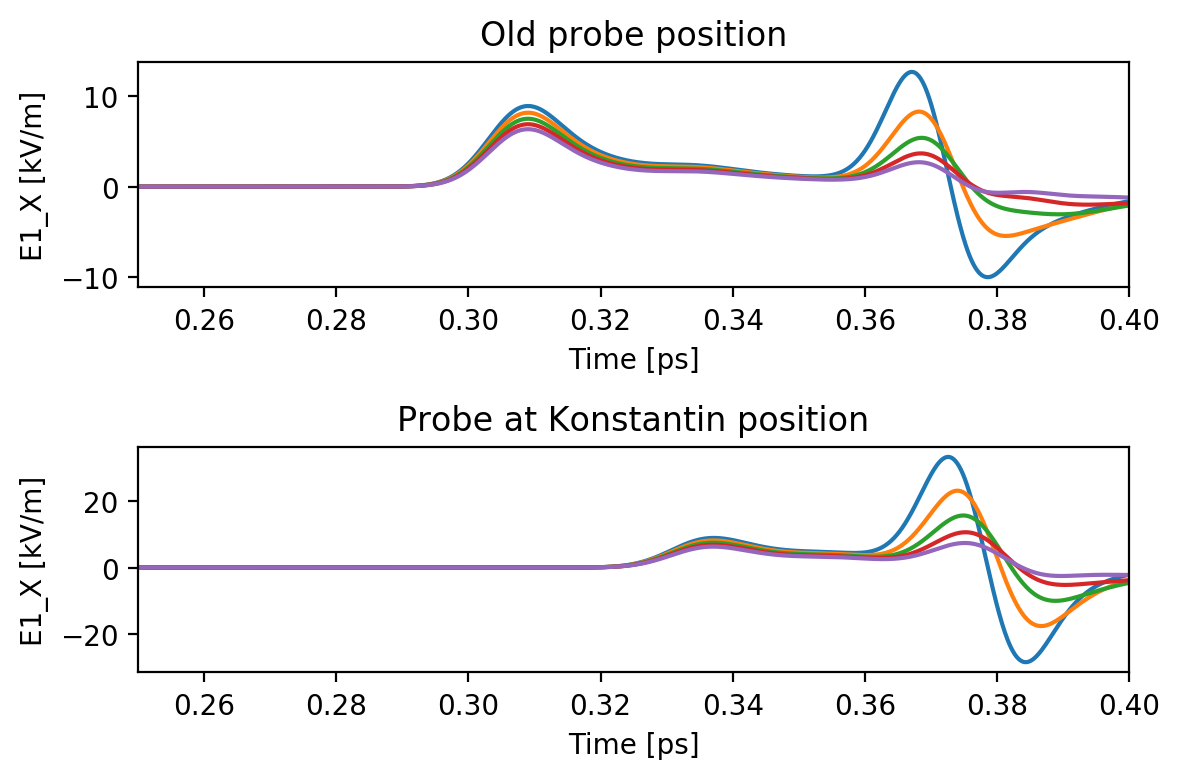

In [7]:
fig, ax = plt.subplots(2, dpi=200)

for k in beam_position:
    xx = data['E-Field (-75 0 0)(X) '].loc[k][0,:]
    yy = 1e-3*data['E-Field (-75 0 0)(X) '].loc[k][1,:]
    ax[0].plot(xx, yy, label=str(k)+' mm')

# ax[0].legend(frameon=True)
ax[0].set_title('Old probe position')
ax[0].set_xlabel('Time [ps]')
ax[0].set_ylabel('E1_X [kV/m]')
ax[0].set_xlim(0.25,0.4)

for k in beam_position:
    xx = data['E-Field (-25 0 35)(X) '].loc[k][0,:]
    yy = 1e-3*data['E-Field (-25 0 35)(X) '].loc[k][1,:]
    ax[1].plot(xx, yy, label=str(k)+' mm')

# ax[1].legend(frameon=True)
ax[1].set_title('Probe at Konstantin position')
ax[1].set_xlabel('Time [ps]')
ax[1].set_ylabel('E1_X [kV/m]')
ax[1].set_xlim(0.25,0.4)

plt.tight_layout()

# plt.savefig('side_abs.png',format='png')

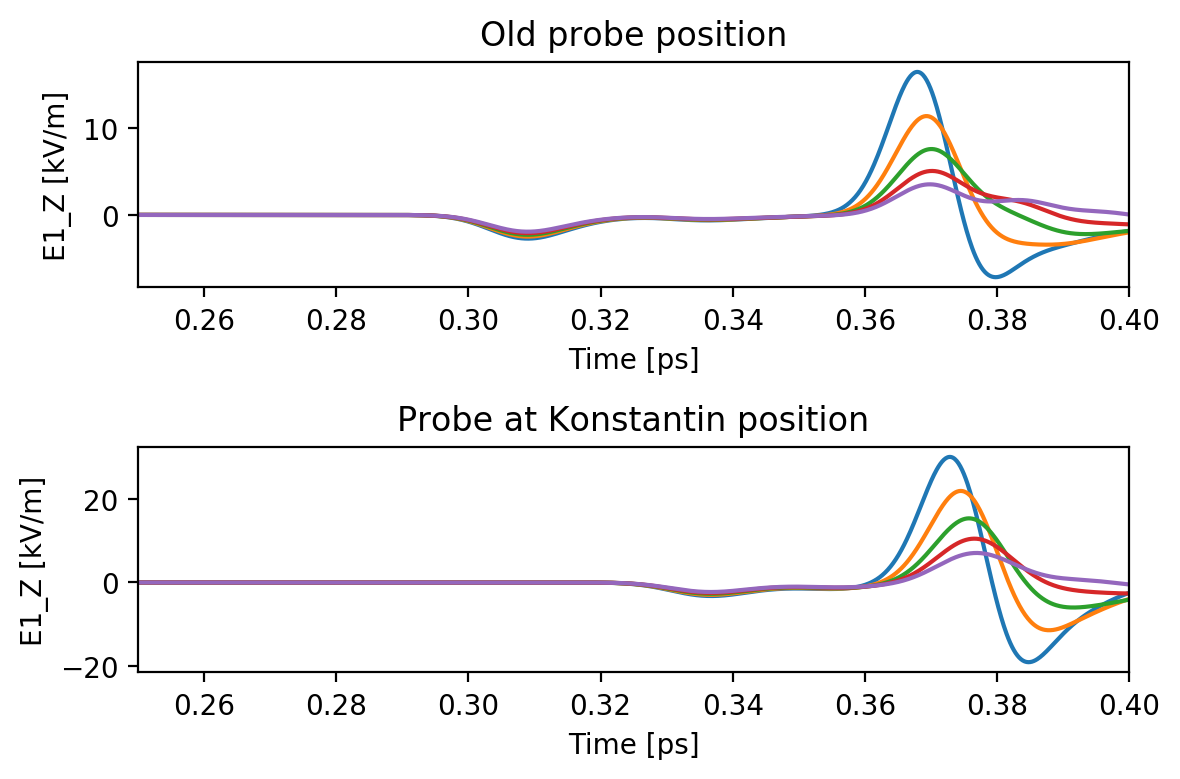

In [8]:
fig, ax = plt.subplots(2, dpi=200)

for k in beam_position:
    xx = data['E-Field (-75 0 0)(Z) '].loc[k][0,:]
    yy = 1e-3*data['E-Field (-75 0 0)(Z) '].loc[k][1,:]
    ax[0].plot(xx, yy, label=str(k)+' mm')

# ax[0].legend(frameon=True)
ax[0].set_title('Old probe position')
ax[0].set_xlabel('Time [ps]')
ax[0].set_ylabel('E1_Z [kV/m]')
ax[0].set_xlim(0.25,0.4)

for k in beam_position:
    xx = data['E-Field (-25 0 35)(Z) '].loc[k][0,:]
    yy = 1e-3*data['E-Field (-25 0 35)(Z) '].loc[k][1,:]
    ax[1].plot(xx, yy, label=str(k)+' mm')

# ax[1].legend(frameon=True)
ax[1].set_title('Probe at Konstantin position')
ax[1].set_xlabel('Time [ps]')
ax[1].set_ylabel('E1_Z [kV/m]')
ax[1].set_xlim(0.25,0.4)

plt.tight_layout()

# plt.savefig('side_abs.png',format='png')

# Get the peak-to-peak

In [9]:
Epp_abs1 = []
for k in beam_position:
    yy = data['E-Field (-75 0 0)(Abs) '].loc[k][1,:][2550:3000]
    Epp_abs1.append(np.max(yy)-np.min(yy))
Epp_abs1 = np.array(Epp_abs1)
    
Epp_X1 = []
for k in beam_position:
    yy = data['E-Field (-75 0 0)(X) '].loc[k][1,:][2550:3000]
    Epp_X1.append(np.max(yy)-np.min(yy))
Epp_X1 = np.array(Epp_X1)

Epp_Z1 = []
for k in beam_position:
    yy = data['E-Field (-75 0 0)(Z) '].loc[k][1,:][2550:3000]
    Epp_Z1.append(np.max(yy)-np.min(yy))
Epp_Z1 = np.array(Epp_Z1)

Epp_abs2 = []
for k in beam_position:
    yy = data['E-Field (75 0 0)(Abs) '].loc[k][1,:][2550:3000]
    Epp_abs2.append(np.max(yy)-np.min(yy))
Epp_abs2 = np.array(Epp_abs2)
    
Epp_X2 = []
for k in beam_position:
    yy = data['E-Field (75 0 0)(X) '].loc[k][1,:][2550:3000]
    Epp_X2.append(np.max(yy)-np.min(yy))
Epp_X2 = np.array(Epp_X2)

Epp_Z2 = []
for k in beam_position:
    yy = data['E-Field (75 0 0)(Z) '].loc[k][1,:][2550:3000]
    Epp_Z2.append(np.max(yy)-np.min(yy))
Epp_Z2 = np.array(Epp_Z2)

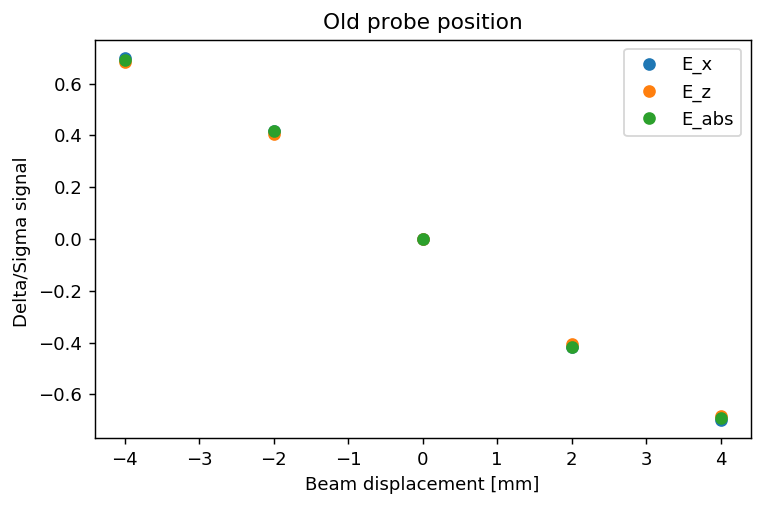

In [10]:
fig, ax = plt.subplots(1, dpi=130)

xx = beam_position
yy = (Epp_X1-Epp_X2)/(Epp_X1+Epp_X2)
ax.plot(xx, yy, 'o', label='E_x')

yy = (Epp_Z1-Epp_Z2)/(Epp_Z1+Epp_Z2)
ax.plot(xx, yy, 'o', label='E_z')

yy = (Epp_abs1-Epp_abs2)/(Epp_abs1+Epp_abs2)
ax.plot(xx, yy, 'o', label='E_abs')

ax.set_title('Old probe position')
ax.set_xlabel('Beam displacement [mm]')
ax.set_ylabel('Delta/Sigma signal ')
ax.legend(frameon=True)
plt.tight_layout()
plt.savefig('Delta_sigma_signal_1cm_old_position_5ns.png', format="png")

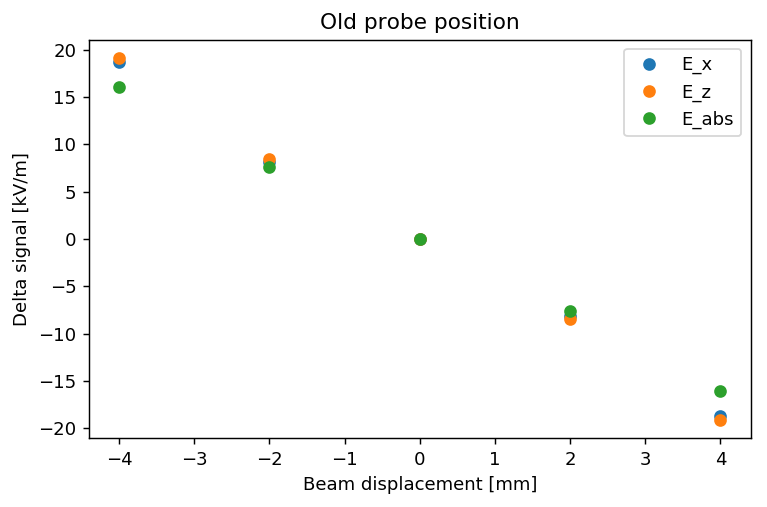

In [11]:
fig, ax = plt.subplots(1, dpi=130)

xx = beam_position
yy = 1e-3*(Epp_X1-Epp_X2)
ax.plot(xx, yy, 'o', label='E_x')

yy = 1e-3*(Epp_Z1-Epp_Z2)
ax.plot(xx, yy, 'o', label='E_z')

yy = 1e-3*(Epp_abs1-Epp_abs2)
ax.plot(xx, yy, 'o', label='E_abs')

ax.set_title('Old probe position')
ax.set_xlabel('Beam displacement [mm]')
ax.set_ylabel('Delta signal [kV/m]')
ax.legend(frameon=True)
plt.tight_layout()
plt.savefig('Delta_signal_1cm_old_position_5ns.png', format="png")

In [12]:
Epp_abs1 = []
for k in beam_position:
    yy = data['E-Field (-25 0 35)(Abs) '].loc[k][1,:][2200:3000]
    Epp_abs1.append(np.max(yy)-np.min(yy))
Epp_abs1 = np.array(Epp_abs1)
    
Epp_X1 = []
for k in beam_position:
    yy = data['E-Field (-25 0 35)(X) '].loc[k][1,:][2200:3000]
    Epp_X1.append(np.max(yy)-np.min(yy))
Epp_X1 = np.array(Epp_X1)

Epp_Z1 = []
for k in beam_position:
    yy = data['E-Field (-25 0 35)(Z) '].loc[k][1,:][2200:3000]
    Epp_Z1.append(np.max(yy)-np.min(yy))
Epp_Z1 = np.array(Epp_Z1)

Epp_abs2 = []
for k in beam_position:
    yy = data['E-Field (25 0 35)(Abs) '].loc[k][1,:][2200:3000]
    Epp_abs2.append(np.max(yy)-np.min(yy))
Epp_abs2 = np.array(Epp_abs2)
    
Epp_X2 = []
for k in beam_position:
    yy = data['E-Field (25 0 35)(X) '].loc[k][1,:][2200:3000]
    Epp_X2.append(np.max(yy)-np.min(yy))
Epp_X2 = np.array(Epp_X2)

Epp_Z2 = []
for k in beam_position:
    yy = data['E-Field (25 0 35)(Z) '].loc[k][1,:][2200:3000]
    Epp_Z2.append(np.max(yy)-np.min(yy))
Epp_Z2 = np.array(Epp_Z2)

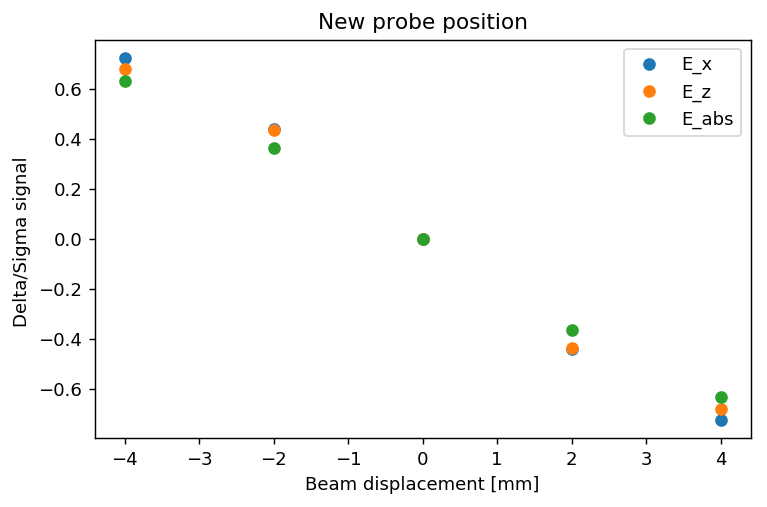

In [13]:
fig, ax = plt.subplots(1, dpi=130)

xx = beam_position
yy = (Epp_X1-Epp_X2)/(Epp_X1+Epp_X2)
ax.plot(xx, yy, 'o', label='E_x')

yy = (Epp_Z1-Epp_Z2)/(Epp_Z1+Epp_Z2)
ax.plot(xx, yy, 'o', label='E_z')

yy = (Epp_abs1-Epp_abs2)/(Epp_abs1+Epp_abs2)
ax.plot(xx, yy, 'o', label='E_abs')

ax.set_title('New probe position')
ax.set_xlabel('Beam displacement [mm]')
ax.set_ylabel('Delta/Sigma signal ')
ax.legend(frameon=True)
plt.tight_layout()
plt.savefig('Delta_sigma_signal_1cm_5ns.png', format="png")

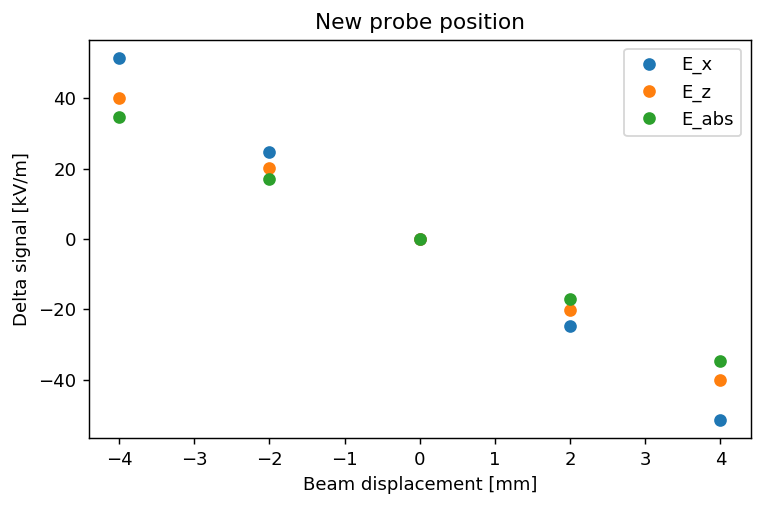

In [14]:
fig, ax = plt.subplots(1, dpi=130)

xx = beam_position
yy = 1e-3*(Epp_X1-Epp_X2)
ax.plot(xx, yy, 'o', label='E_x')

yy = 1e-3*(Epp_Z1-Epp_Z2)
ax.plot(xx, yy, 'o', label='E_z')

yy = 1e-3*(Epp_abs1-Epp_abs2)
ax.plot(xx, yy, 'o', label='E_abs')

ax.set_title('New probe position')
ax.set_xlabel('Beam displacement [mm]')
ax.set_ylabel('Delta signal [kV/m]')
ax.legend(frameon=True)
plt.tight_layout()
plt.savefig('Delta_signal_1cm_5ns.png', format="png")